In [19]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns

In [11]:
RANKS = ['IRON','BRONZE','SILVER','GOLD','PLATINUM','DIAMOND','MASTER','GRANDMASTER','CHALLENGER']

In [4]:
def get_data():
    df = pd.read_csv("C:\Git\league-game-result-predictor\src\data\master_data.csv")
    return df

In [5]:
def randomizer(df):
    df = df.sample(frac=1)
    df.reset_index(drop=True, inplace=True)
    return df

In [9]:
def get_count(df,rank):
    f = len(df[(df['rank'] == rank)])
    return f


In [7]:
d = get_data()
d = randomizer(d)
d.head()

,_id,ally_baron_kills,ally_dragon_kills,ally_inhibitor_kills,ally_kills,ally_rift_kills,ally_tower_kills,enemy_baron_kills,enemy_dragon_kills,enemy_inhibitor_kills,enemy_kills,enemy_rift_kills,enemy_tower_kills,rank,score_diff,win
0,NATQnYHWUymtJbBdRdnHpo,1,4,2,38,0,8,1,3,1,41,2,6,GOLD,-0.772349,True
1,NA9K0LgMUfu6AOOtCedcyr,1,2,1,46,0,7,1,3,2,55,2,7,GOLD,-3.807219,False
2,NAUzutNB2JaOQlm8kmrtwx,1,1,0,33,0,7,0,4,5,47,2,11,GOLD,-4.652577,False
3,NAO0uRomUF2sbOz3SLknF4,1,1,0,28,1,2,0,4,4,42,0,11,IRON,-10.804169,False
4,NAjnmp0pBInga1jTtlkaEm,2,3,3,39,0,9,0,2,0,38,2,5,SILVER,-0.581361,True


The current shape of the dataset is:  (36334, 16)


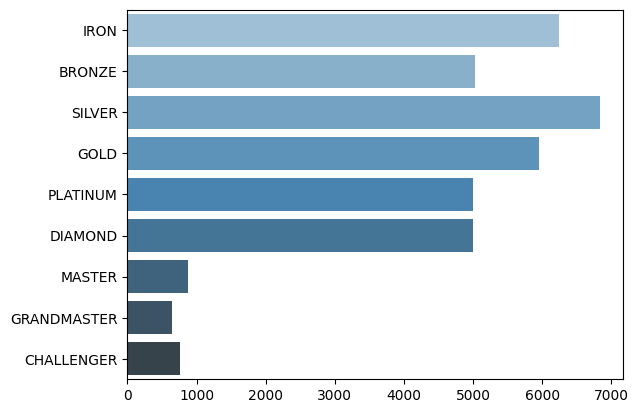

In [30]:
print('The current shape of the dataset is: ',d.shape)
from matplotlib import pyplot as plt
x = [get_count(d,i) for i in RANKS]
sns.barplot(y=RANKS,x=x,orient='h',palette='Blues_d')
plt.show()

In [51]:
print("Win rate when the score is positive for each rank")
percentages = []
for i in RANKS:
    count = d[d['rank'] == i and d['score_dff'] > 0 and d['win'] is True].count()
    total_games = len(d[d['rank'] == i])
    percentages.append(count/total_games * 100)
percentages

Win rate when the score is positive for each rank


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [32]:
print('Checking for duplicates in the dataset...')
print(f'There are {d.duplicated().sum()} duplicates in the dataset')
if d.duplicated().sum() > 0:
    print('Removing duplicates...')
    d.drop_duplicates(inplace=True)
print('The current shape of the dataset is: ',d.shape)


Checking for duplicates in the dataset...
There are 0 duplicates in the dataset
The current shape of the dataset is:  (36334, 16)


In [33]:
print('Checking for null values in the dataset...')
print(f'There are {d.isnull().sum().sum()} null values in the dataset')
if d.isnull().sum().sum() > 0:
    print('Removing null values...')
    d.dropna(inplace=True)
print('The current shape of the dataset is: ',d.shape)


Checking for null values in the dataset...
There are 0 null values in the dataset
The current shape of the dataset is:  (36334, 16)


In [34]:
print("Separating the dataset into features and target...")
X = d.drop(['_id','win'],axis=1)
print("One hot encoding the rank feature and dropping the original feature...")
rank_onehot = pd.get_dummies(X['rank']).astype(int)
X = pd.concat([X,rank_onehot],axis=1)
X.drop(['rank'],axis=1,inplace=True)
y = d['win']
print(f"The current shape of the dataset is: X = {X.shape} y = {y.shape}")
X.head()

Separating the dataset into features and target...
One hot encoding the rank feature and dropping the original feature...
The current shape of the dataset is: X = (36334, 22) y = (36334,)


,ally_baron_kills,ally_dragon_kills,ally_inhibitor_kills,ally_kills,ally_rift_kills,ally_tower_kills,enemy_baron_kills,enemy_dragon_kills,enemy_inhibitor_kills,enemy_kills,...,score_diff,BRONZE,CHALLENGER,DIAMOND,GOLD,GRANDMASTER,IRON,MASTER,PLATINUM,SILVER
0,1,4,2,38,0,8,1,3,1,41,...,-0.772349,0,0,0,1,0,0,0,0,0
1,1,2,1,46,0,7,1,3,2,55,...,-3.807219,0,0,0,1,0,0,0,0,0
2,1,1,0,33,0,7,0,4,5,47,...,-4.652577,0,0,0,1,0,0,0,0,0
3,1,1,0,28,1,2,0,4,4,42,...,-10.804169,0,0,0,0,0,1,0,0,0
4,2,3,3,39,0,9,0,2,0,38,...,-0.581361,0,0,0,0,0,0,0,0,1


In [37]:
from sklearn.model_selection import train_test_split
print("Splitting the dataset into training and test sets...")
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
print('The current shape of the feature training set is: ',X_train.shape)
print('The current shape of the feature test set is: ',X_test.shape)
print('The current shape of the label training set is: ',y_train.shape)
print('The current shape of the label test set is: ',y_test.shape)

Splitting the dataset into training and test sets...
The current shape of the feature training set is:  (29067, 22)
The current shape of the feature test set is:  (7267, 22)
The current shape of the label training set is:  (29067,)
The current shape of the label test set is:  (7267,)


In [56]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout 

model = Sequential(
    layers=[
        layers.Input(shape=(X_train.shape[1],)),
        layers.Dense(64,activation='relu'),
        layers.Dense(128,activation='relu'),
        layers.Dense(256,activation='relu'),
        layers.Dense(128,activation='relu'),
        layers.Dense(64,activation='relu'),
        layers.Dense(32,activation='relu'),
        layers.Dense(16,activation='relu'),
        layers.Dense(1,activation='sigmoid')]
)

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1472      
                                                                 
 dense_1 (Dense)             (None, 128)               8320      
                                                                 
 dense_2 (Dense)             (None, 256)               33024     
                                                                 
 dense_3 (Dense)             (None, 128)               32896     
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 32)                2080      
                                                                 
 dense_6 (Dense)             (None, 16)                5